# Clase 10: Reorganización y Agrupación de Datos

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**

## Objetivos


Es Habitual que la información se encuentre dispersa en distintas fuentes y con distintas formas. 
El dar forma, organizar, unir y agrupar estas distintas fuentes de información es una componente muy importante del análisis de datos. 

- Aprender a organizar los `DataFrames`: transponer, pivotear y fundir (melt).
- Explorar el mecanismo de agrupación de pandas: Group By, aggregate, transform y filter.

### Roadmap

**Unidad 2: Manejo de Datos con Pandas y AED**

- [X] Introducción a pandas: DataFrames, Series, Operaciones básicas y Filtrado.
- [X] Agregaciones.
- [ ] Visualizaciones interactivas usando Plotly.
- [ ] Concatenaciones y Merge de Dataframes.
- [ ] Multi-índices y Trabajo con strings y datos temporales, categóricos y ordinales en Pandas.
- [ ] Análisis exploratorio de Datos (AED).





## Cargando Índices para una Vida Mejor

En esta clase, seguiremos usando los datos de índices para una Vida Mejor de la OECD:


<img src="./resources/oecd.png" alt="OECD Better life index"/>


http://www.oecdbetterlifeindex.org/

https://stats.oecd.org/index.aspx?DataSetCode=BLI

Son 11 criterios considerados como esenciales para el bienestar de la población. Cada crierio contiene uno o mas indicadores:

### Índices para una Vida Mejor

Para explicar `pandas`, analizaremos datos de la OECD, en particular de los índices para una Vida Mejor:


<img src="./resources/oecd.png" alt="OECD Better life index"/>


http://www.oecdbetterlifeindex.org/

https://stats.oecd.org/Index.aspx?DataSetCode=BLI

Son 11 temas considerados como esenciales para el bienestar de la población. Cada crierio contiene uno o mas indicadores

| Tema | Indicador (Inglés) | Indicador (Español) | Unidad | Descripción |
|---|---|---|---|---|
| Vivienda 🏠 | Dwellings without basic facilities | Vivienda con Instalaciones Básicas | Porcentaje | Porcentaje de personas con inodoros de agua corriente dentro del hogar, año disponible más reciente |
|  | Housing expenditure | Gastos en Vivienda | Porcentaje | Proporción de costos de vivienda en el ingreso neto ajustado de las familias, año disponible más reciente |
|  | Rooms per person | Habitaciones por Persona | Ratio | Número promedio de habitaciones compartidas por persona en una vivienda, año disponible más reciente |
| Ingresos 💰 | Household net adjusted disposable income | Ingreso Familiar Disponible | US Dollar | Cantidad promedio de dinero que una familia gana al año, después de impuestos, año disponible más reciente |
|  | Household net wealth | Patrimonio Neto Familiar | US Dollar | Valor total promedio de los activos financieros de una familia (ahorros, acciones) menos sus pasivos (créditos), año disponible más reciente |
| Empleo ⚙️ | Labour market insecurity | Seguridad en el Empleo | Porcentaje | Pérdida esperada de ingresos cuando alguien queda desempleado, año disponible más reciente |
|  | Employment rate | Tasa de Empleo | Porcentaje | Porcentaje de personas, de 15 a 64 años de edad, actualmente con empleo remunerado, año disponible más reciente |
|  | Long-term unemployment rate | Tasa de Empleo a Largo Plazo | Porcentaje | Porcentaje de personas, de 15 a 64 años de edad, que no trabajan pero que han buscado empleo activamente durante más de un año, año disponible más reciente |
|  | Personal earnings | Ingresos Personales | US Dollar | Ingresos anuales promedio por empleado de tiempo completo, año disponible más reciente |
| Comunidad 🧑‍🤝‍🧑   | Quality of support network  | Calidad del Apoyo Social | Porcentaje | Porcentaje de personas con amigos o parientes en quienes confiar en caso de necesidad |
| Educación 📚 | Educational attainment | Nivel de Educación | Porcentaje | Porcentaje de personas, de 25 a 64 años de edad, graduadas por lo menos de educación media superior, año disponible más reciente |
|  | Student skills | Competencias de estudiantes en matemáticas, lectura y ciencias | Puntaje promedio | Desempeño promedio de estudiantes de 15 años de edad, según PISA (Programa para la Evaluación Internacional de Estudiantes) |
|  | Years in education  | Nivel de educación | Años | Duración promedio de la educación formal en la que un niño de cinco años de edad puede esperar matricularse durante su vida |
| Medio Ambiente 🌳 | Air pollution | Contaminación del Aire | Microgramos por metro cúbico | Concentración promedio de partículas (PM2.5) en ciudades con poblaciones mayores de 100,000 personas, medida en microgramos por metro cúbico, año disponible más reciente |
|  | Water quality | Calidad del Agua | Porcentaje | Porcentaje de personas que informan estar satisfechas con la calidad del agua local |
| Compromiso Cívico 🗳️  | Stakeholder engagement for developing regulations | Participación de los interesados en la elaboración de regulaciones | Puntaje promedio | Nivel de transparencia gubernamental al preparar las regulaciones, año disponible más reciente |
|  | Voter turnout | Participación electoral | Porcentaje | Porcentaje de votantes registrados que votaron durante las elecciones recientes, año disponible más reciente |
| Salud ⚕️ | Life expectancy | Esperanza de vida | Años | Número promedio de años que una persona puede esperar vivir, año disponible más reciente |
|  | Self-reported health | Salud según informan las personas | Porcentaje | Porcentaje de personas que informan que su salud es «buena o muy buena», año disponible más reciente |
| Satisfacción ✨ | Life satisfaction | Satisfacción ante la vida | Puntaje promedio | Autoevaluación promedio de satisfacción ante la vida, en una escala de 0 a 10 |
| Seguridad 🌃 | Feeling safe walking alone at night | Sentimiento de seguridad al caminar solos por la noche | Porcentaje | Porcentaje de personas que reportan sentirse seguras al caminar solas por la noche  |
|  | Homicide rate | Tasa de homicidios | Ratio | Número promedio de homicidios reportados por 100,000 personas, año disponible más reciente |
| Balance Vida Trabajo 🧘 | Employees working very long hours | Empleados que trabajan muchas horas | Porcentaje | Porcentaje de empleados que trabajan más de cincuenta horas a la semana en promedio, año disponible más reciente |
|  | Time devoted to leisure and personal care | Tiempo destinado al ocio y el cuidado personal | Horas | Número promedio de minutos al día dedicados al ocio y el cuidado personal, incluidos el sueño y la alimentación |

In [1]:
import pandas as pd

dataset = pd.read_csv('./resources/dataset.csv')
dataset.head(5)

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GPD per capita (2018)
0,Australia,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,...,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667,57395.919470
1,Austria,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,...,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000,51525.046430
2,Belgium,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,...,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000,47491.323260
3,Brazil,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,...,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667,9001.234249
4,Canada,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,...,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333,46313.171370


## Organizar Datos: Transponer, Pivotear y Fundir DataFrames

## 1.- Transponer Datos

Simplemente invertir las filas por las columnas.

In [2]:
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Country,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Czech Republic,Denmark,Estonia,...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Air pollution,5.0,16.0,15.0,10.0,7.0,16.0,10.0,20.0,9.0,8.0,...,15.0,21.0,16.0,22.0,11.0,6.0,15.0,20.0,11.0,10.0
Dwellings without basic facilities,NaN,0.9,1.9,6.7,0.2,9.4,23.9,0.7,0.5,7.0,...,14.8,1.2,0.4,37.0,0.1,0.0,0.1,8.0,0.3,0.1
Educational attainment,81.0,85.0,77.0,49.0,91.333333,65.0,54.0,93.666667,81.0,88.666667,...,94.0,91.333333,88.0,73.333333,59.0,83.0,87.666667,39.0,81.0,90.666667
Employees working very long hours,12.84,6.59,4.703333,7.006667,3.673333,9.316667,26.006667,5.496667,2.316667,2.436667,...,0.14,4.073333,4.333333,17.84,3.963333,1.066667,0.37,31.043333,12.123333,10.99
Employment rate,73.0,72.0,63.333333,61.0,73.333333,62.666667,67.0,73.666667,74.0,74.0,...,70.333333,66.0,69.333333,43.333333,62.333333,76.666667,79.666667,51.666667,75.0,70.0
Feeling safe walking alone at night,64.133333,80.7,70.266667,35.866667,82.5,48.0,44.566667,72.533333,83.566667,69.633333,...,53.466667,63.7,86.166667,36.333333,82.166667,75.566667,85.333333,59.833333,77.766667,73.9
Homicide rate,1.1,0.466667,1.033333,27.0,1.266667,4.2,25.0,0.5,0.6,3.166667,...,9.933333,0.8,0.6,14.0,0.6,0.9,0.6,1.366667,0.166667,5.5
Household net adjusted disposable income,32759.0,33541.0,30364.0,NaN,30854.0,NaN,NaN,21453.0,29606.0,19697.0,...,NaN,20474.0,20820.0,NaN,23999.0,31287.0,37466.0,NaN,28715.0,45284.0
Household net wealth,427064.0,308325.0,386006.0,NaN,423849.0,100967.0,NaN,NaN,118637.0,159373.0,...,NaN,119696.0,203044.0,NaN,373548.0,NaN,NaN,NaN,548392.0,632100.0


## 2.- Pivotear Datos


El dataset que usamos la clase pasada está relativamente ordenado.

In [3]:
dataset.head(5)

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GPD per capita (2018)
0,Australia,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,...,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667,57395.919470
1,Austria,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,...,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000,51525.046430
2,Belgium,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,...,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000,47491.323260
3,Brazil,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,...,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667,9001.234249
4,Canada,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,...,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333,46313.171370


Sin embargo, originalmente tenía la siguiente estructura:

In [4]:
dataset_original = pd.read_csv('./resources/bli_original.csv')
dataset_original.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [5]:
dataset_original.loc[:, ['Country', 'Indicator', 'Unit', 'Value']].head(20)

,Country,Indicator,Unit,Value
0,Australia,Labour market insecurity,Percentage,5.4
1,Austria,Labour market insecurity,Percentage,3.5
2,Belgium,Labour market insecurity,Percentage,3.7
3,Canada,Labour market insecurity,Percentage,6.0
4,Czech Republic,Labour market insecurity,Percentage,3.1
5,Denmark,Labour market insecurity,Percentage,4.2
6,Finland,Labour market insecurity,Percentage,3.9
7,France,Labour market insecurity,Percentage,7.6
8,Germany,Labour market insecurity,Percentage,2.7
9,Greece,Labour market insecurity,Percentage,29.8


In [6]:
dataset_original['Indicator']

0                Labour market insecurity
1                Labour market insecurity
2                Labour market insecurity
3                Labour market insecurity
4                Labour market insecurity
                      ...                
2364    Employees working very long hours
2365    Employees working very long hours
2366    Employees working very long hours
2367    Employees working very long hours
2368    Employees working very long hours
Name: Indicator, Length: 2369, dtype: object

In [7]:
dataset_original.shape

(2369, 17)

Cada fila de este dataset contiene información acerca de los paises y de los indicadores y el valor del indicador. Sin emabrgo, en su forma original es relativamente compleja de analizar.

**Pivotear**

In [8]:
dataset.head(3)

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GPD per capita (2018)
0,Australia,5.0,NaN,81.0,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,...,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667,57395.91947
1,Austria,16.0,0.9,85.0,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,...,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000,51525.04643
2,Belgium,15.0,1.9,77.0,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,...,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000,47491.32326


![Pivot](./resources/pivot.png)

In [9]:
dataset_original['Indicator'].unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [10]:
dataset_original.sample(10).loc[:, ['Country', 'Indicator', 'Value']]

,Country,Indicator,Value
2314,Colombia,Student skills,411.00
519,Slovenia,Employment rate,69.00
700,Switzerland,Long-term unemployment rate,2.00
324,Italy,Feeling safe walking alone at night,64.80
115,Mexico,Labour market insecurity,6.26
2205,Denmark,Time devoted to leisure and personal care,15.87
1215,Denmark,Years in education,19.50
1812,OECD - Total,Self-reported health,61.00
374,Spain,Feeling safe walking alone at night,79.70
342,Chile,Feeling safe walking alone at night,52.60


> **Ejercicio ✏️**: Pivotear la tabla original de los datos de la OECD


In [11]:
indice = 'Country'
columna = 'Indicator'
valor = 'Value'

In [12]:
pd.pivot_table(dataset_original, 
                         index=indice, 
                         columns=columna, 
                         values=valor).head(5)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,20.0,...,49126.0,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667
Austria,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,21.0,...,50349.0,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000
Belgium,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,21.0,...,49675.0,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000
Brazil,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,NaN,...,NaN,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667
Canada,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,22.0,...,47622.0,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333


## 3.- Multi-Índices

Podemos también agregar varios niveles de indices y de columnas. 
Esto se le conoce como Multi-index.

In [13]:
dataset_original.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN


In [14]:
dataset_multindex = pd.pivot_table(dataset_original,
                                   index=['Country', 'LOCATION'],
                                   columns=['Indicator', 'Unit'],
                                   values='Value')
dataset_multindex.head(5)

,Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
,Unit,Micrograms per cubic metre,Percentage,Percentage,Percentage,Percentage,Percentage,Ratio,US Dollar,US Dollar,Percentage,...,US Dollar,Percentage,Ratio,Percentage,Average score,Average score,Hours,Percentage,Percentage,Years
Country,LOCATION,,,,,,,,,,,,,,,,,,,,,
Australia,AUS,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,20.0,...,49126.0,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667
Austria,AUT,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,21.0,...,50349.0,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000
Belgium,BEL,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,21.0,...,49675.0,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000
Brazil,BRA,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,NaN,...,NaN,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667
Canada,CAN,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,22.0,...,47622.0,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333


In [15]:
dataset_multindex.index

MultiIndex([(      'Australia',  'AUS'),
            (        'Austria',  'AUT'),
            (        'Belgium',  'BEL'),
            (         'Brazil',  'BRA'),
            (         'Canada',  'CAN'),
            (          'Chile',  'CHL'),
            (       'Colombia',  'COL'),
            ( 'Czech Republic',  'CZE'),
            (        'Denmark',  'DNK'),
            (        'Estonia',  'EST'),
            (        'Finland',  'FIN'),
            (         'France',  'FRA'),
            (        'Germany',  'DEU'),
            (         'Greece',  'GRC'),
            (        'Hungary',  'HUN'),
            (        'Iceland',  'ISL'),
            (        'Ireland',  'IRL'),
            (         'Israel',  'ISR'),
            (          'Italy',  'ITA'),
            (          'Japan',  'JPN'),
            (          'Korea',  'KOR'),
            (         'Latvia',  'LVA'),
            (      'Lithuania',  'LTU'),
            (     'Luxembourg',  'LUX'),
            (   

Ojo que las columnas también son Indices!

In [16]:
dataset_multindex.columns.values

array([('Air pollution', 'Micrograms per cubic metre'),
       ('Dwellings without basic facilities', 'Percentage'),
       ('Educational attainment', 'Percentage'),
       ('Employees working very long hours', 'Percentage'),
       ('Employment rate', 'Percentage'),
       ('Feeling safe walking alone at night', 'Percentage'),
       ('Homicide rate', 'Ratio'),
       ('Household net adjusted disposable income', 'US Dollar'),
       ('Household net wealth', 'US Dollar'),
       ('Housing expenditure', 'Percentage'),
       ('Labour market insecurity', 'Percentage'),
       ('Life expectancy', 'Years'),
       ('Life satisfaction', 'Average score'),
       ('Long-term unemployment rate', 'Percentage'),
       ('Personal earnings', 'US Dollar'),
       ('Quality of support network', 'Percentage'),
       ('Rooms per person', 'Ratio'),
       ('Self-reported health', 'Percentage'),
       ('Stakeholder engagement for developing regulations', 'Average score'),
       ('Student skills', 'A

Podemos acceder a los indices de cada nivel usando `get_level_values`

In [17]:
dataset_multindex.head(3)

,Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
,Unit,Micrograms per cubic metre,Percentage,Percentage,Percentage,Percentage,Percentage,Ratio,US Dollar,US Dollar,Percentage,...,US Dollar,Percentage,Ratio,Percentage,Average score,Average score,Hours,Percentage,Percentage,Years
Country,LOCATION,,,,,,,,,,,,,,,,,,,,,
Australia,AUS,5.0,NaN,81.0,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,20.0,...,49126.0,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667
Austria,AUT,16.0,0.9,85.0,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,21.0,...,50349.0,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000
Belgium,BEL,15.0,1.9,77.0,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,21.0,...,49675.0,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000


In [18]:
dataset_multindex.index.get_level_values(0)

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Colombia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'OECD - Total', 'Poland',
       'Portugal', 'Russia', 'Slovak Republic', 'Slovenia', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'],
      dtype='object', name='Country')

In [19]:
dataset_multindex.index.get_level_values(1)

Index(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHL', 'COL', 'CZE', 'DNK', 'EST',
       'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN',
       'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'OECD', 'POL',
       'PRT', 'RUS', 'SVK', 'SVN', 'ZAF', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR',
       'USA'],
      dtype='object', name='LOCATION')

También a cierto nivel de las columnas

In [20]:
dataset_multindex.columns.get_level_values(0)

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [21]:
dataset_multindex.columns.get_level_values(1)

Index(['Micrograms per cubic metre', 'Percentage', 'Percentage', 'Percentage',
       'Percentage', 'Percentage', 'Ratio', 'US Dollar', 'US Dollar',
       'Percentage', 'Percentage', 'Years', 'Average score', 'Percentage',
       'US Dollar', 'Percentage', 'Ratio', 'Percentage', 'Average score',
       'Average score', 'Hours', 'Percentage', 'Percentage', 'Years'],
      dtype='object', name='Unit')

### Acceder a multiindice

> **Ejercicio ✏️**: Seleccionar la fila que contiene a Chile

In [22]:
dataset_multindex.head(3)

,Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
,Unit,Micrograms per cubic metre,Percentage,Percentage,Percentage,Percentage,Percentage,Ratio,US Dollar,US Dollar,Percentage,...,US Dollar,Percentage,Ratio,Percentage,Average score,Average score,Hours,Percentage,Percentage,Years
Country,LOCATION,,,,,,,,,,,,,,,,,,,,,
Australia,AUS,5.0,NaN,81.0,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,20.0,...,49126.0,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667
Austria,AUT,16.0,0.9,85.0,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,21.0,...,50349.0,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000
Belgium,BEL,15.0,1.9,77.0,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,21.0,...,49675.0,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000


In [23]:
dataset_multindex.loc['Chile']

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Unit,Micrograms per cubic metre,Percentage,Percentage,Percentage,Percentage,Percentage,Ratio,US Dollar,US Dollar,Percentage,...,US Dollar,Percentage,Ratio,Percentage,Average score,Average score,Hours,Percentage,Percentage,Years
LOCATION,,,,,,,,,,,,,,,,,,,,,
CHL,16.0,9.4,65.0,9.316667,62.666667,48.0,4.2,NaN,100967.0,18.0,...,25879.0,84.6,1.2,57.0,1.3,443.8,NaN,47.0,71.0,17.5


> **Ejercicio ✏️**: Seleccionar la columna que contiene a Life expectancy

In [24]:
dataset_multindex.loc[:, ('Life expectancy', 'Years')]

Country          LOCATION
Australia        AUS         82.500000
Austria          AUT         81.700000
Belgium          BEL         81.500000
Brazil           BRA         74.766667
Canada           CAN         81.866667
Chile            CHL         79.900000
Colombia         COL         76.233333
Czech Republic   CZE         79.100000
Denmark          DNK         80.900000
Estonia          EST         77.766667
Finland          FIN         81.500000
France           FRA         82.366667
Germany          DEU         81.066667
Greece           GRC         81.466667
Hungary          HUN         76.166667
Iceland          ISL         82.266667
Ireland          IRL         81.766667
Israel           ISR         82.466667
Italy            ITA         83.300000
Japan            JPN         84.066667
Korea            KOR         82.366667
Latvia           LVA         74.700000
Lithuania        LTU         74.800000
Luxembourg       LUX         82.766667
Mexico           MEX         75.400000

> **Ejercicio ✏️**: Seleccionar la fila que contiene a Chile y la columna que contiene a Life expectancy

In [25]:
dataset_multindex.loc['Chile', ('Life expectancy', 'Years')]

LOCATION
CHL    79.9
Name: (Life expectancy, Years), dtype: float64

> **Ejercicio ✏️**: Seleccionar las columnas de los indicadores basados en Porcentajes.

## 4.- Fundir / Melt

El proceso inverso al pivoteado:

![Melt](./resources/melt.png)

En este caso retornaremos a algo similar al formato original del dataset:

In [26]:
dataset.head(5)

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GPD per capita (2018)
0,Australia,5.0,NaN,81.000000,12.840000,73.000000,64.133333,1.100000,32759.0,427064.0,...,95.25,NaN,87.25,2.7,411.2,14.350000,91.0,92.666667,20.966667,57395.919470
1,Austria,16.0,0.9,85.000000,6.590000,72.000000,80.700000,0.466667,33541.0,308325.0,...,92.00,1.6,70.60,1.3,492.8,14.530000,80.0,92.000000,17.000000,51525.046430
2,Belgium,15.0,1.9,77.000000,4.703333,63.333333,70.266667,1.033333,30364.0,386006.0,...,92.00,2.2,73.60,2.0,503.8,15.663333,89.0,83.666667,19.300000,47491.323260
3,Brazil,10.0,6.7,49.000000,7.006667,61.000000,35.866667,27.000000,NaN,NaN,...,89.25,NaN,NaN,2.2,398.2,NaN,79.0,73.000000,16.166667,9001.234249
4,Canada,7.0,0.2,91.333333,3.673333,73.333333,82.500000,1.266667,30854.0,423849.0,...,93.25,2.6,87.80,2.9,523.2,14.553333,68.0,91.000000,17.333333,46313.171370


In [27]:
dataset.reset_index(drop=True).melt(id_vars=['Country'])

,Country,variable,value
0,Australia,Air pollution,5.000000
1,Austria,Air pollution,16.000000
2,Belgium,Air pollution,15.000000
3,Brazil,Air pollution,10.000000
4,Canada,Air pollution,7.000000
...,...,...,...
1020,Sweden,GPD per capita (2018),54589.060390
1021,Switzerland,GPD per capita (2018),82818.108160
1022,Turkey,GPD per capita (2018),9370.176355
1023,United Kingdom,GPD per capita (2018),43043.227820


## 5.- Agregaciones con Group By


![Group By](./resources/group_by.png)

**Group by** es un proceso que implica uno o más de los siguientes pasos:


- **Separar** los datos bajo algún criterio o grupo.

- **Aplicar** esta función a estos datos agrupados.

- **Combinar** los resultados en un nuevo `DataFrame`.


Comunmente deseamos hacer alguna operación sobre los datos agrupados.

- **Agregar**: Calcular alguna métrica o estadístico por grupo.

    - Tamaño/Conteo.
    - Promedio/Desviación Estandar.


- **Transformar**: Hacer transformaciones por grupo (Propuesto):

    - Estandarizar datos.
    - Rellenar NaN's con promedios, etc...


- **Filtrar**: Descartar algunos grupos según algún criterio (Propuesto).


- **Alguna combinación de todos los anteriores**.


### Dataset de Temperaturas Globales

![wbg_climate](./resources/wbg_climate.png)


https://climateknowledgeportal.worldbank.org/download-data

**Cargar Dataset de Temperaturas Globales**

In [90]:
temperaturas = pd.read_csv('./resources/temperature.csv')
temperaturas.head(3)

,Temperature,Year,Month,Country,ISO3
0,-0.03110,1991,Jan,Afghanistan,AFG
1,1.43654,1991,Feb,Afghanistan,AFG
2,6.88685,1991,Mar,Afghanistan,AFG


In [91]:
temperaturas.columns

Index(['Temperature', 'Year', 'Month', 'Country', 'ISO3'], dtype='object')

**Filtrar solo los de Chile**

In [92]:
temperaturas['Country'] == 'Chile'

0        False
1        False
2        False
3        False
4        False
         ...  
59899    False
59900    False
59901    False
59902    False
59903    False
Name: Country, Length: 59904, dtype: bool

In [93]:
t_chile = temperaturas[temperaturas['Country'] == 'Chile']
t_chile

,Temperature,Year,Month,Country,ISO3
10608,12.53860,1991,Jan,Chile,CHL
10609,12.29140,1991,Feb,Chile,CHL
10610,11.13730,1991,Mar,Chile,CHL
10611,8.85700,1991,Apr,Chile,CHL
10612,6.70605,1991,May,Chile,CHL
...,...,...,...,...,...
10915,5.83910,2016,Aug,Chile,CHL
10916,7.19059,2016,Sep,Chile,CHL
10917,8.81492,2016,Oct,Chile,CHL
10918,10.71450,2016,Nov,Chile,CHL


In [94]:
import plotly.express as px

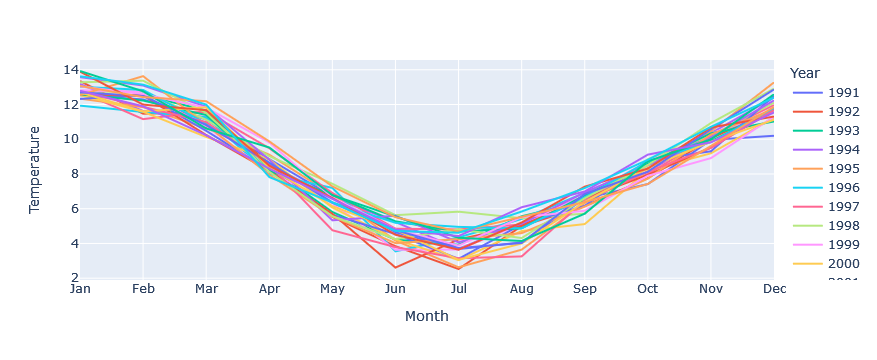

In [95]:
px.line(t_chile, x="Month", y="Temperature", color='Year')

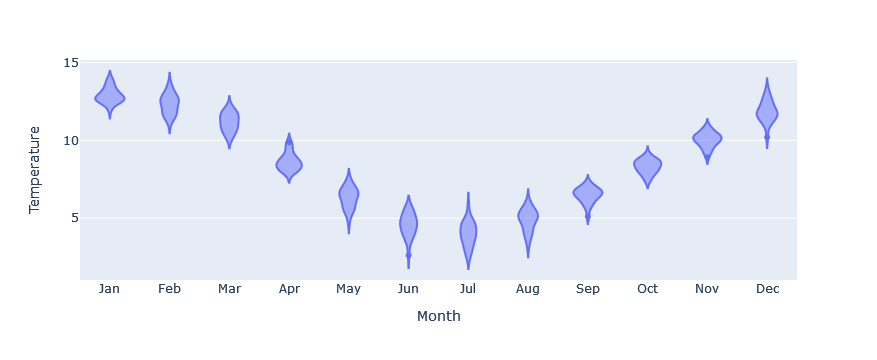

In [96]:
fig = px.violin(t_chile, x="Month", y="Temperature")
fig.show()

### Paso 1: Separar

En esta parte veremos el primer paso del group-by: **Separar** por grupos.


![Group By](./resources/group_by.png)


Para esto, agrupamos temperaturas de Chile por mes:

#### Cantidad de Grupos

In [97]:
t_chile.head(3)

,Temperature,Year,Month,Country,ISO3
10608,12.5386,1991,Jan,Chile,CHL
10609,12.2914,1991,Feb,Chile,CHL
10610,11.1373,1991,Mar,Chile,CHL


In [98]:
len(t_chile.groupby('Month'))

12

#### Obtener el Listado de Grupos que Generó 

In [100]:
import pprint
pprint.pprint(t_chile.groupby('Month').groups)

{'Apr': Int64Index([10611, 10623, 10635, 10647, 10659, 10671, 10683, 10695, 10707,
            10719, 10731, 10743, 10755, 10767, 10779, 10791, 10803, 10815,
            10827, 10839, 10851, 10863, 10875, 10887, 10899, 10911],
           dtype='int64'),
 'Aug': Int64Index([10615, 10627, 10639, 10651, 10663, 10675, 10687, 10699, 10711,
            10723, 10735, 10747, 10759, 10771, 10783, 10795, 10807, 10819,
            10831, 10843, 10855, 10867, 10879, 10891, 10903, 10915],
           dtype='int64'),
 'Dec': Int64Index([10619, 10631, 10643, 10655, 10667, 10679, 10691, 10703, 10715,
            10727, 10739, 10751, 10763, 10775, 10787, 10799, 10811, 10823,
            10835, 10847, 10859, 10871, 10883, 10895, 10907, 10919],
           dtype='int64'),
 'Feb': Int64Index([10609, 10621, 10633, 10645, 10657, 10669, 10681, 10693, 10705,
            10717, 10729, 10741, 10753, 10765, 10777, 10789, 10801, 10813,
            10825, 10837, 10849, 10861, 10873, 10885, 10897, 10909],
           

In [101]:
t_chile.loc[
    [10611, 10623, 10635, 10647, 10659, 10671, 10683, 10695, 10707, 10719, 10731, 10743, 10755, 10767, 10779, 10791, 10803, 10815, 10827, 10839, 10851, 10863, 10875, 10887, 10899, 10911]
]

,Temperature,Year,Month,Country,ISO3
10611,8.85700,1991,Apr,Chile,CHL
10623,8.61049,1992,Apr,Chile,CHL
10635,8.37375,1993,Apr,Chile,CHL
10647,8.52128,1994,Apr,Chile,CHL
10659,9.11017,1995,Apr,Chile,CHL
10671,7.99297,1996,Apr,Chile,CHL
10683,9.48273,1997,Apr,Chile,CHL
10695,9.02652,1998,Apr,Chile,CHL
10707,8.12245,1999,Apr,Chile,CHL
10719,8.84131,2000,Apr,Chile,CHL


#### Obtener algún grupo en particular

In [102]:
t_chile.groupby('Month').get_group('Apr')

,Temperature,Year,Month,Country,ISO3
10611,8.85700,1991,Apr,Chile,CHL
10623,8.61049,1992,Apr,Chile,CHL
10635,8.37375,1993,Apr,Chile,CHL
10647,8.52128,1994,Apr,Chile,CHL
10659,9.11017,1995,Apr,Chile,CHL
10671,7.99297,1996,Apr,Chile,CHL
10683,9.48273,1997,Apr,Chile,CHL
10695,9.02652,1998,Apr,Chile,CHL
10707,8.12245,1999,Apr,Chile,CHL
10719,8.84131,2000,Apr,Chile,CHL


### Paso 2: Aplicar

En este paso veremos las distintas opciones que tenemos en el paso **aplicar**: agregar, transformar o filtrar.

![Group By](./resources/group_by.png)



#### Agregar

Una de estas opciones son las funciones de agregación: operaciones que cuentan o obtienen estadísticos a cerca de cada grupo.

Algunas funciones de agregación built-in de pandas son:

<img src="./resources/aggregations.png" alt="Agregaciones" width=450px/>


##### Tamaño

In [103]:
t_chile.groupby('Month').size()

Month
Apr    26
Aug    26
Dec    26
Feb    26
Jan    26
Jul    26
Jun    26
Mar    26
May    26
Nov    26
Oct    26
Sep    26
dtype: int64

##### Promedio

**Por  Mes**

In [104]:
t_chile

,Temperature,Year,Month,Country,ISO3
10608,12.53860,1991,Jan,Chile,CHL
10609,12.29140,1991,Feb,Chile,CHL
10610,11.13730,1991,Mar,Chile,CHL
10611,8.85700,1991,Apr,Chile,CHL
10612,6.70605,1991,May,Chile,CHL
...,...,...,...,...,...
10915,5.83910,2016,Aug,Chile,CHL
10916,7.19059,2016,Sep,Chile,CHL
10917,8.81492,2016,Oct,Chile,CHL
10918,10.71450,2016,Nov,Chile,CHL


In [105]:
t_chile_prom_mes = t_chile.groupby('Month').mean()
t_chile_prom_mes

,Temperature,Year
Month,,
Apr,8.632918,2003.5
Aug,4.874367,2003.5
Dec,11.862162,2003.5
Feb,12.331531,2003.5
Jan,12.890127,2003.5
Jul,3.990776,2003.5
Jun,4.566924,2003.5
Mar,11.175054,2003.5
May,6.305406,2003.5


In [106]:
MONTHS = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
    'Nov', 'Dec'
]

t_chile_prom_mes = t_chile.groupby('Month').mean()
t_chile_prom_mes = t_chile_prom_mes.loc[MONTHS]

t_chile_prom_mes

,Temperature,Year
Month,,
Jan,12.890127,2003.5
Feb,12.331531,2003.5
Mar,11.175054,2003.5
Apr,8.632918,2003.5
May,6.305406,2003.5
Jun,4.566924,2003.5
Jul,3.990776,2003.5
Aug,4.874367,2003.5
Sep,6.479313,2003.5


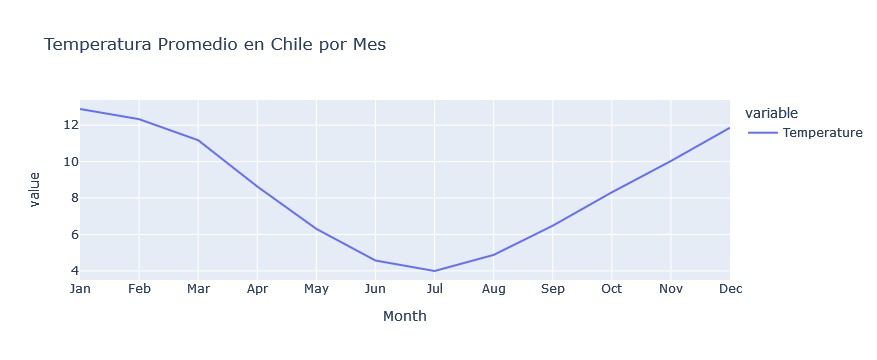

In [107]:
px.line(
    t_chile_prom_mes['Temperature'],
    title='Temperatura Promedio en Chile por Mes',
)

In [108]:
t_chile

,Temperature,Year,Month,Country,ISO3
10608,12.53860,1991,Jan,Chile,CHL
10609,12.29140,1991,Feb,Chile,CHL
10610,11.13730,1991,Mar,Chile,CHL
10611,8.85700,1991,Apr,Chile,CHL
10612,6.70605,1991,May,Chile,CHL
...,...,...,...,...,...
10915,5.83910,2016,Aug,Chile,CHL
10916,7.19059,2016,Sep,Chile,CHL
10917,8.81492,2016,Oct,Chile,CHL
10918,10.71450,2016,Nov,Chile,CHL


> Ejercicio: Agrupar por lustros y ver como se mueve la media.

**Por Año**

In [109]:
t_chile_prom_año = t_chile.groupby('Year').mean()
t_chile_prom_año

,Temperature
Year,
1991,8.174618
1992,8.132774
1993,8.435058
1994,8.583360
1995,8.296743
1996,8.378638
1997,8.626498
1998,8.903882
1999,8.373395


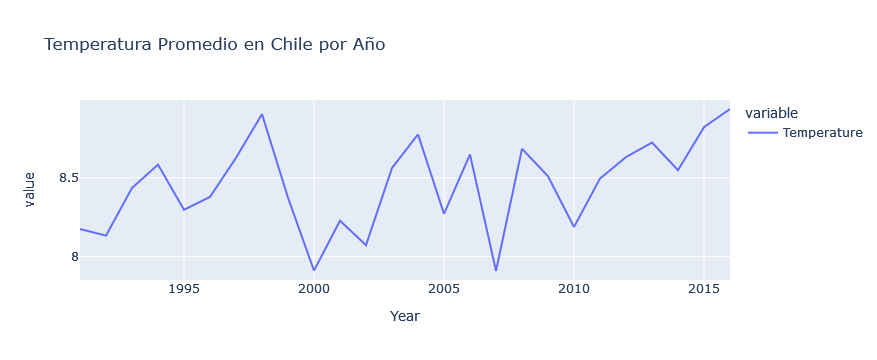

In [110]:
px.line(
    t_chile_prom_año,
    title='Temperatura Promedio en Chile por Año',
)


#### Describe 

Por mes:

In [111]:
chile_t_stats = t_chile.groupby('Month').describe()['Temperature']
chile_t_stats = chile_t_stats.loc[MONTHS]
chile_t_stats

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
Jan,26.0,12.890127,0.489691,11.93590,12.552500,12.747900,13.157900,13.92960
Feb,26.0,12.331531,0.634695,11.15750,11.855550,12.459100,12.744125,13.63310
Mar,26.0,11.175054,0.583369,10.13310,10.753150,11.198250,11.646675,12.18950
Apr,26.0,8.632918,0.561895,7.82234,8.197055,8.531000,8.853077,9.87860
May,26.0,6.305406,0.658122,4.75968,5.735210,6.363575,6.760283,7.43721
Jun,26.0,4.566924,0.731938,2.61044,4.182020,4.681900,5.105257,5.62819
Jul,26.0,3.990776,0.782743,2.52941,3.643715,3.995465,4.568388,5.82987
Aug,26.0,4.874367,0.694196,3.25353,4.381372,5.060210,5.360117,6.08457
Sep,26.0,6.479313,0.492104,5.11566,6.202398,6.596555,6.762740,7.26955


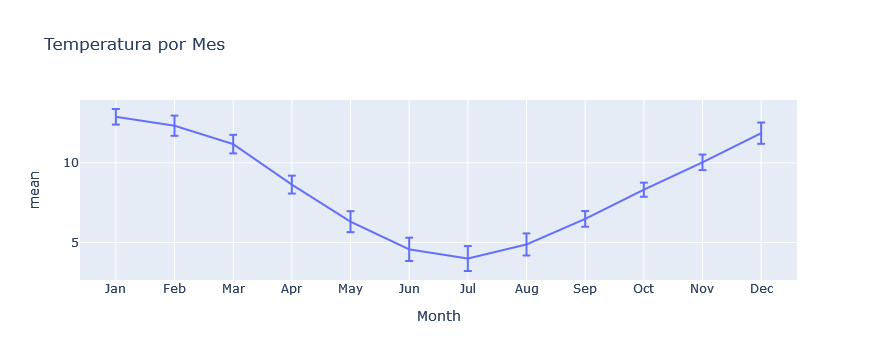

In [119]:
px.line(chile_t_stats.reset_index(), 
        x='Month', 
        y='mean', 
        error_y='std', 
        title='Temperatura por Mes')

#### Usar como filtro

Exactamente igual a `temperaturas[temperaturas['Country'] == 'Chile']`

In [120]:
temperaturas.head(10)

,Temperature,Year,Month,Country,ISO3
0,-0.03110,1991,Jan,Afghanistan,AFG
1,1.43654,1991,Feb,Afghanistan,AFG
2,6.88685,1991,Mar,Afghanistan,AFG
3,12.93970,1991,Apr,Afghanistan,AFG
4,17.07550,1991,May,Afghanistan,AFG
5,23.07770,1991,Jun,Afghanistan,AFG
6,25.57100,1991,Jul,Afghanistan,AFG
7,23.96730,1991,Aug,Afghanistan,AFG
8,19.38000,1991,Sep,Afghanistan,AFG
9,12.87790,1991,Oct,Afghanistan,AFG


In [121]:
temperaturas['Country'] == 'Chile'

0        False
1        False
2        False
3        False
4        False
         ...  
59899    False
59900    False
59901    False
59902    False
59903    False
Name: Country, Length: 59904, dtype: bool

In [122]:
temperaturas[temperaturas['Country'] == 'Chile' ].head(3)

,Temperature,Year,Month,Country,ISO3
10608,12.5386,1991,Jan,Chile,CHL
10609,12.2914,1991,Feb,Chile,CHL
10610,11.1373,1991,Mar,Chile,CHL


In [123]:
temperaturas.groupby(['Country']).get_group('Chile')

,Temperature,Year,Month,Country,ISO3
10608,12.53860,1991,Jan,Chile,CHL
10609,12.29140,1991,Feb,Chile,CHL
10610,11.13730,1991,Mar,Chile,CHL
10611,8.85700,1991,Apr,Chile,CHL
10612,6.70605,1991,May,Chile,CHL
...,...,...,...,...,...
10915,5.83910,2016,Aug,Chile,CHL
10916,7.19059,2016,Sep,Chile,CHL
10917,8.81492,2016,Oct,Chile,CHL
10918,10.71450,2016,Nov,Chile,CHL


#### Multi-indice

También podemos ejecutar la agregación sobre varias columnas. Esto generará un DataFrame multi-indice.

In [124]:
stats_general = temperaturas.groupby(['Country', 'Year']).describe()

In [125]:
stats_general

Temperature                                            \
                       count       mean       std       min        25%   
Country     Year                                                         
Afghanistan 1991        12.0  12.894488  8.980163  -0.03110   6.224065   
            1992        12.0  12.544548  8.386016   0.74637   5.404147   
            1993        12.0  12.977138  8.719243  -0.08350   5.673917   
            1994        12.0  13.080018  8.875672   1.11415   7.360107   
            1995        12.0  13.040895  9.092189   0.92358   5.517030   
...                      ...        ...       ...       ...        ...   
Venezuela   2012        12.0  25.764883  0.374583  25.21710  25.501125   
            2013        12.0  25.922492  0.553798  25.29310  25.465375   
            2014        12.0  26.028775  0.477228  25.39520  25.724875   
            2015        12.0  26.438175  0.430423  25.63690  26.114800   
            2016        12.0  26.478200  0.474389  25.84420  26.120150   

                                                
                       50%        75%      max  
Country     Year                                
Afghanistan 1991  12.90880  20.304425  25.5710  
            1992  12.19535  19.109925  24.7068  
            1993  12.70540  20.447725  24.6320  
            1994  12.24925  19.975575  25.0045  
            1995  12.90710  20.140400  25.7798  
...                    ...        ...      ...  
Venezuela   2012  25.72885  26.049450  26.4330  
            2013  25.93485  26.091300  27.1409  
            2014  25.87900  26.356625  26.9757  
            2015  26.50315  26.729575  27.0908  
            2016  26.41585  26.755900  27.3357  

[4992 rows x 8 columns]

In [126]:
temperature_stats_general = stats_general['Temperature']

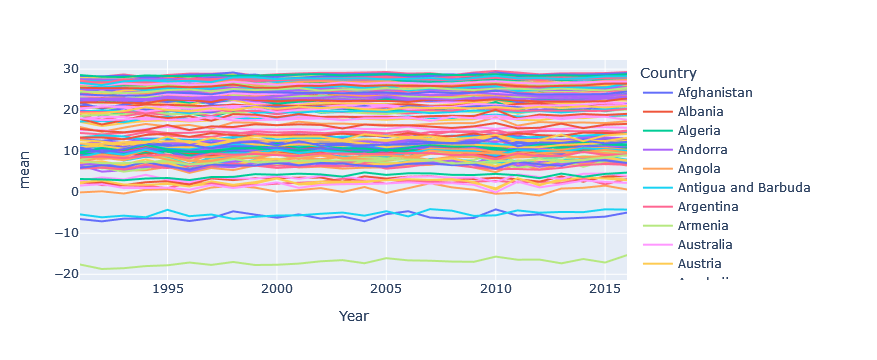

In [127]:
px.line(temperature_stats_general.reset_index(), x='Year', y='mean', color='Country')

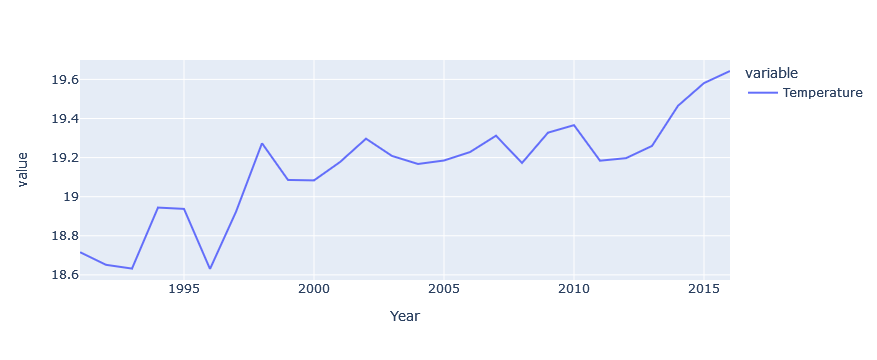

In [128]:
prom_t_año_global = temperaturas.groupby(['Year']).mean()
px.line(prom_t_año_global)